# Problema

Implementación de la regresión lineal

## Instrucciones

Generar una implementación correcta de la regresión lineal usando el descenso del gradiente como método de optimización de los pesos y compararlo con la implementación directa de la librería sklearn (los valores de w y b no serán exactamente iguales pero muy similares)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [9]:
np.random.seed(0)
X = np.random.uniform(1, 10, 5000)
error = np.random.normal(0, 5, 5000)
y = 50 + 5 * X + error 

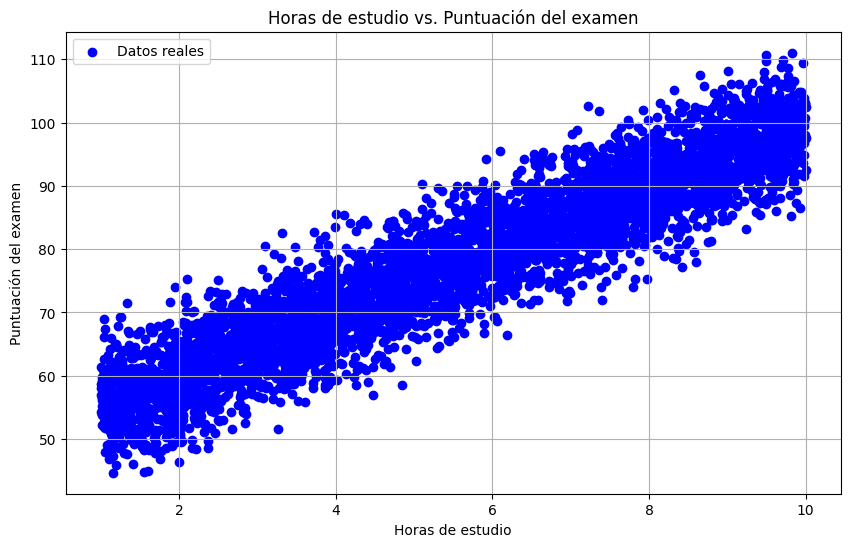

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  

print('Datos de Entrenamiento:', X_train.shape[0])
print('Datos de Validación:', X_val.shape[0])
print('Datos de Test:', X_test.shape[0])

Datos de Entrenamiento: 3000
Datos de Validación: 1000
Datos de Test: 1000


## Implementación manual de la regresión con gradiente descendente

In [22]:
import numpy as np

def cost_function(y_true, y_pred):
    n = len(y_true)
    squared_error = (y_true - y_pred) ** 2
    cost = (1 / n) * squared_error.sum()
    return cost

def train_regression(X_train, y_train, X_val, y_val, lr, epochs):
    X_train = np.array(X_train)
    X_val = np.array(X_val)
    y_train = np.array(y_train)
    y_val = np.array(y_val)
    
    print("Forma de X_train:", X_train.shape)
    print("Forma de X_val:", X_val.shape)
    
    if len(X_train.shape) == 1:
        X_train = X_train.reshape(-1, 1)
    if len(X_val.shape) == 1:
        X_val = X_val.reshape(-1, 1)
    
    w = np.zeros(X_train.shape[1])
    b = 0
    
    train_loss_per_epoch = []
    val_loss_per_epoch = []
    
    for epoch in range(epochs):
        y_train_pred = np.dot(X_train, w) + b
        
        train_loss = cost_function(y_train, y_train_pred)
        train_loss_per_epoch.append(train_loss)
        
        w_gradient = (-2 / len(X_train)) * np.dot(X_train.T, (y_train - y_train_pred))
        b_gradient = (-2 / len(X_train)) * np.sum(y_train - y_train_pred)
        
        w -= lr * w_gradient
        b -= lr * b_gradient
        
        y_val_pred = np.dot(X_val, w) + b
        
        val_loss = cost_function(y_val, y_val_pred)
        val_loss_per_epoch.append(val_loss)
        
    return w, b, train_loss_per_epoch, val_loss_per_epoch


In [23]:
lr = 0.01
epochs = 100  

w, b, train_loss_per_epoch, val_loss_per_epoch = train_regression(X_train, y_train, X_val, y_val, lr=lr, epochs=epochs)

Forma de X_train: (3000,)
Forma de X_val: (1000,)


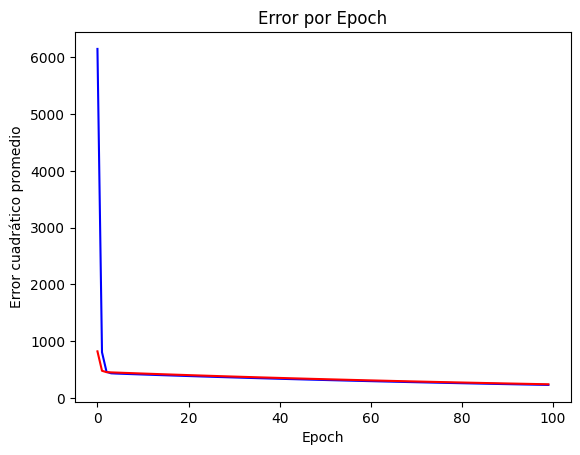

In [24]:
plt.figure()
plt.plot(range(epochs), train_loss_per_epoch, '-b')
plt.plot(range(epochs), val_loss_per_epoch, '-r')
plt.xlabel('Epoch')
plt.ylabel('Error cuadrático promedio')
plt.title('Error por Epoch')
plt.show()

Costo del modelo: 243.1198270664017


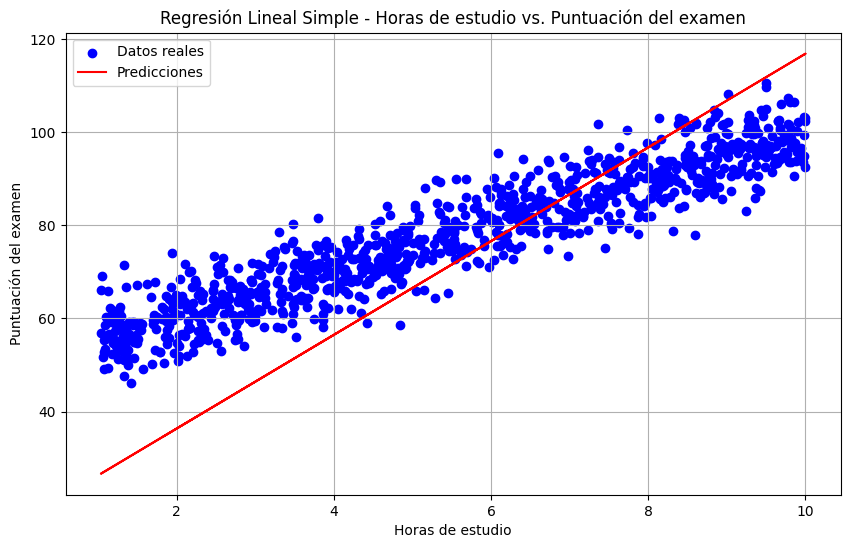

In [27]:
X_test_reshaped = X_test.reshape(-1, 1)
y_pred = np.dot(X_test_reshaped, w) + b

cost = cost_function(y_test, y_pred)

print("Costo del modelo:", cost)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MSE en el conjunto de test:", mse)
print("MAE en el conjunto de test:", mae)
print("R^2 en el conjunto de test:", r2)
print("MAPE en el conjunto de test:", mape)

MSE en el conjunto de test: 243.1198270664017
MAE en el conjunto de test: 13.156106873316912
R^2 en el conjunto de test: -0.21974336344697543
MAPE en el conjunto de test: 18.552206281903512


## Implementación de la regresión lineal usando sklearn

In [32]:
import numpy as np

X_train_reshaped = X_train.reshape(-1, 1)
y_train_reshaped = y_train.reshape(-1, 1)

modelo_regresion_lineal = LinearRegression()
modelo_regresion_lineal.fit(X_train_reshaped, y_train_reshaped)

LinearRegression()

Costo del modelo: 25.249637383330825


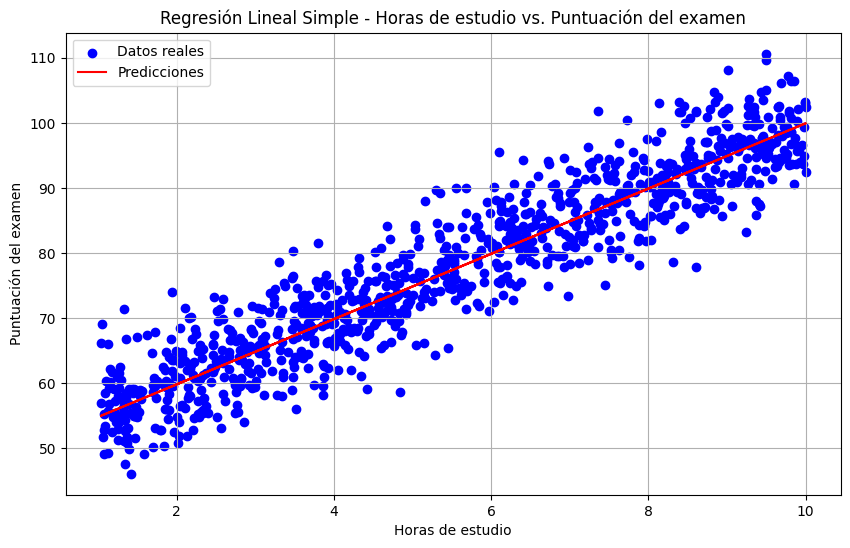

In [33]:
y_pred = modelo_regresion_lineal.predict(X_test_reshaped)
cost = mean_squared_error(y_test, y_pred)

print("Costo del modelo:", cost)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_train_pred = modelo_regresion_lineal.predict(X_train_reshaped)

mse = mean_squared_error(y_train, y_train_pred)

mae = mean_absolute_error(y_train, y_train_pred)

r2 = r2_score(y_train, y_train_pred)

mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

print("MSE en el conjunto de entrenamiento:", mse)
print("MAE en el conjunto de entrenamiento:", mae)
print("R^2 en el conjunto de entrenamiento:", r2)
print("MAPE en el conjunto de entrenamiento:", mape)

MSE en el conjunto de entrenamiento: 23.437293509479936
MAE en el conjunto de entrenamiento: 3.829111436954274
R^2 en el conjunto de entrenamiento: 0.8770641646391161
MAPE en el conjunto de entrenamiento: 20.862478316636977


## Comparación de parámetros obtenidos

In [35]:
b = modelo_regresion_lineal.intercept_
w = modelo_regresion_lineal.coef_[0]

b_sklearn = modelo_regresion_lineal.intercept_
w_sklearn = modelo_regresion_lineal.coef_[0]

print("Coeficiente de intercepción (b) - Manual:", b)
print("Coeficiente de pendiente (w) - Manual:", w)
print("Coeficiente de intercepción (b) - Scikit-learn:", b_sklearn)
print("Coeficiente de pendiente (w) - Scikit-learn:", w_sklearn)

Coeficiente de intercepción (b) - Manual: [49.79376935]
Coeficiente de pendiente (w) - Manual: [5.01401554]
Coeficiente de intercepción (b) - Scikit-learn: [49.79376935]
Coeficiente de pendiente (w) - Scikit-learn: [5.01401554]
